## $$\textbf{Artificial intelligence algorithms}$$
### $$\textbf{Mini project on :}$$
### $$\texttt{Digit Recognition using Artifical Neural Nets.}$$


$\textbf{Project Overview}$
This project implements a deep learning solution for the Kaggle Digit Recognizer competition, which uses the famous MNIST dataset. The goal is to correctly identify digits from handwritten images.
Dataset

- $\texttt{Source:}$ Modified National Institute of Standards and Technology (MNIST) database 
- $\texttt{Features:}$ 28x28 pixel grayscale images of handwritten digits (0-9) 
- $\texttt{Training set:}$ 42,000 labeled images 
- $\texttt{Test set:}$ 28,000 unlabeled images for submission 


In this step, we import all the essential libraries needed throughout the project:

- $\textbf{NumPy}$ and $\textbf{Pandas}$: For handling numerical arrays and tabular data.
- $\textbf{Matplotlib}$ and $\textbf{Seaborn}$: For creating visualizations to better understand the data and training process.
- $\textbf{TensorFlow/Keras}$: This is our deep learning framework. We use it to build, train, and evaluate the Convolutional Neural Network (CNN).
  - Sequential: To define our CNN as a linear stack of layers.
  - Layers such as Conv2D, MaxPooling2D, and Dense form the architecture of our model.
  - Callbacks: Help us control the learning process (like stopping early or adjusting the learning rate).
  - ImageDataGenerator: Used for data augmentation.
- $\textbf{Scikit-learn}$: For splitting the dataset and evaluating the model's classification performance.
- $\textbf{Random Seeds}$: Ensuring reproducibility by fixing random seed values for NumPy and TensorFlow.

Lastly, we configure the notebook’s visualization settings to make our plots clearer and more consistent.


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# For analysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Display settings
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set(style='whitegrid')

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

print(f"Training data shape: {train_data.shape}")
print(f"Testing data shape: {test_data.shape}")

# Display the first few rows of the training data
train_data.head()

Training data shape: (42000, 785)
Testing data shape: (28000, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


$\textbf{Understanding the Data Dimensions}$

We check the shape of both the training and testing datasets:

- **Training Data**: `(42000, 785)`  
  This includes 42,000 samples with 785 columns — 784 pixel values (28×28 image) and 1 label column indicating the digit (0–9).

- **Testing Data**: `(28000, 784)`  
  This dataset contains 28,000 samples with only pixel values. Since it's meant for prediction, it has no label column.

This dimensional check ensures we understand how the data is structured before moving into preprocessing.



We now prepare the data for training:

- $\texttt{X\_train}$: Contains only the pixel values from the training set (shape: $42{,}000 \times 784$).
- $\texttt{y\_train}$: Contains the corresponding digit labels (0–9) for each training image (shape: $42{,}000$).
- $\texttt{X\_test}$: Contains pixel values for the $28{,}000$ unlabeled test images (shape: $28{,}000 \times 784$).

This separation is essential because the model needs features ($X$) for input and labels ($y$) to learn from.

In [3]:
# Separate features and labels
X_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values
X_test = test_data.values

# Check the shapes
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (42000, 784)
y_train shape: (42000,)
X_test shape: (28000, 784)


To verify the integrity of our data, we define a helper function display_samples() that:

- Randomly selects $\texttt{num\_samples}$ images from the training data.
- Reshapes each flat $784$-dimensional vector into a $28 \times 28$ image.
- Displays the images in grayscale with their corresponding digit labels.

This step is useful for gaining an intuitive understanding of what the model will learn to classify. It also helps ensure the data has been loaded and interpreted correctly.

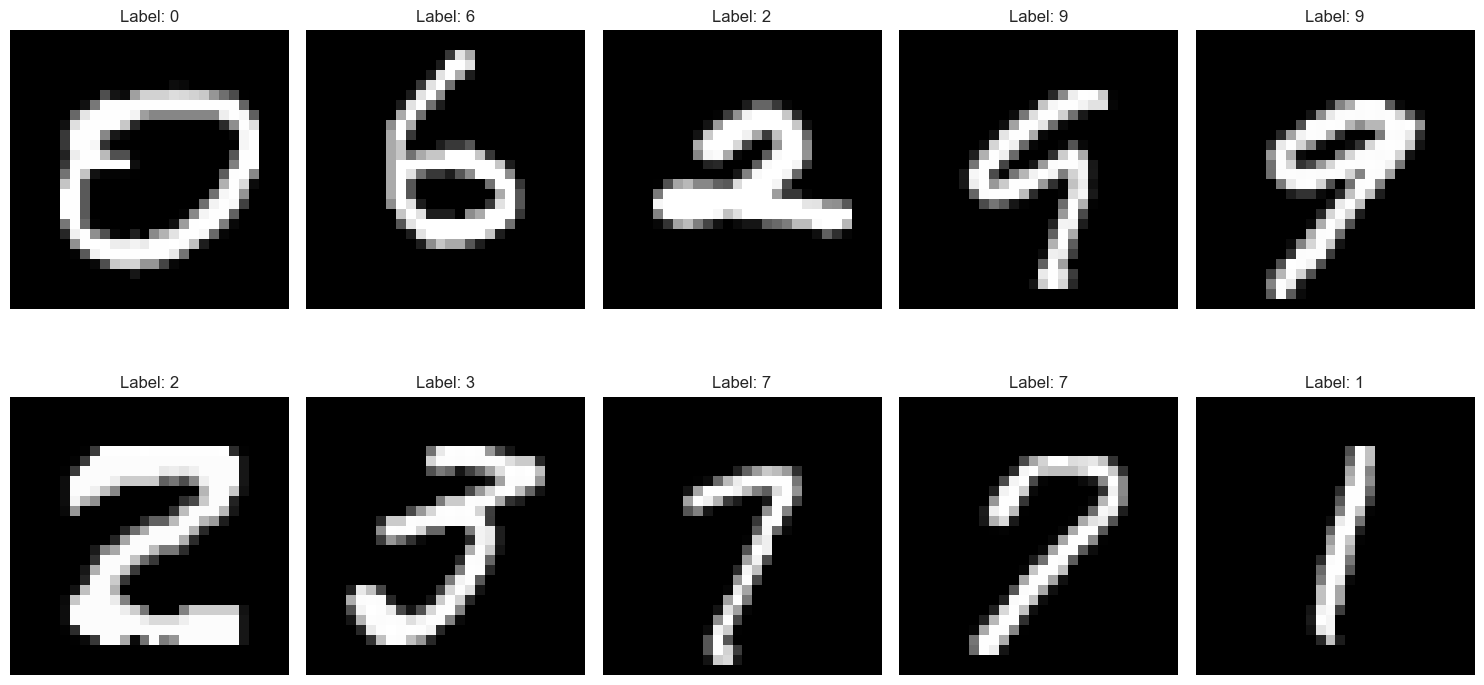

In [4]:
# Function to display random samples
def display_samples(num_samples=10):
    indices = np.random.randint(0, X_train.shape[0], size=num_samples)
    
    plt.figure(figsize=(15, 8))
    for i, idx in enumerate(indices):
        plt.subplot(2, 5, i+1)
        plt.imshow(X_train[idx].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {y_train[idx]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display random samples
display_samples()

We use a **count plot** and value counts to visualize how many examples of each digit (0–9) are present in the training dataset.

- A balanced dataset is critical for training a model that performs well across all classes.
- This bar chart helps us detect any potential class imbalances.
- From the printed counts, we can confirm whether the dataset has a uniform distribution of digit labels.

A well-balanced distribution ensures that the model won’t become biased toward more frequent classes.


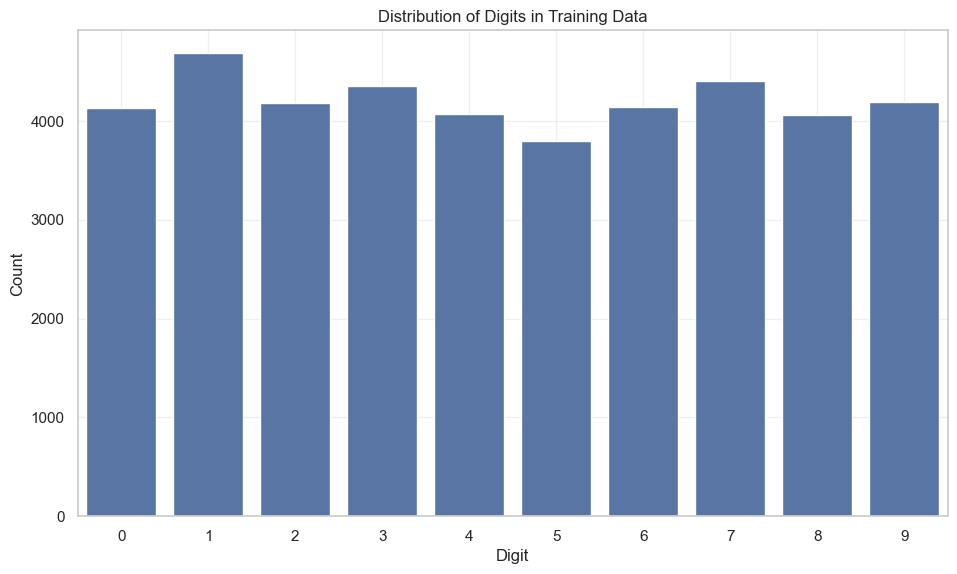

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: count, dtype: int64


In [5]:
# Count the occurrences of each digit
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train)
plt.title('Distribution of Digits in Training Data')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.show()

# Print the counts
print(pd.Series(y_train).value_counts().sort_index())

To prepare the data for training a CNN, we apply the following preprocessing steps:

1. **Normalization:**
   - Pixel values originally range from 0 to 255.
   - We scale them to the range $[0, 1]$ by dividing by 255. This helps the model train faster and more efficiently.

2. **Reshaping:**
   - Each image is reshaped from a flat vector of shape $(784,)$ to a 3D tensor of shape $(28, 28, 1)$, where 1 represents the grayscale channel.
   - CNNs expect input in this 3D format to perform convolution operations.

3. **One-Hot Encoding:**
   - Labels are converted from scalar values (e.g., 3) to one-hot vectors (e.g., $[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]$).
   - This format is required for multi-class classification with softmax output.

4. **Train/Validation Split:**
   - The original training data is split into:
     - **Training Set (90%)** used for model learning.
     - **Validation Set (10%)** used to monitor performance and tune hyperparameters.
   - stratify= y_train ensures each class is proportionally represented in both subsets.

These preprocessing steps are crucial to ensure that the CNN receives input in the correct format and can effectively learn from the data.

In [6]:
# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape to 28x28x1 (adding channel dimension)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=10)

# Split the training data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train_onehot, test_size=0.1, random_state=42, stratify=y_train
)

# Print shapes after preprocessing
print(f"X_train_split shape: {X_train_split.shape}")
print(f"y_train_split shape: {y_train_split.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")

X_train_split shape: (37800, 28, 28, 1)
y_train_split shape: (37800, 10)
X_val shape: (4200, 28, 28, 1)
y_val shape: (4200, 10)
X_test shape: (28000, 28, 28, 1)


To help prevent overfitting and improve model generalization, we use **data augmentation**. This technique artificially increases the diversity of the training dataset by applying random transformations such as:

- **Rotation**
- **Shifting**
- **Zooming**
- **Flipping**, etc.

In this step:

- We randomly select one training image and generate multiple **augmented versions** using the ImageDataGenerator.
- The first subplot shows the **original image**, followed by 11 **augmented versions** of that same image.
- Although the images look different, the **label remains the same**.

This visualization shows how the model will learn to recognize digits under varying conditions — just like it would in real-world handwritten input.

Mathematically, if $x \in \mathbb{R}^{28 \times 28}$ is the original image, data augmentation generates a set $\{ T_i(x) \}$, where $T_i$ is a random transformation such that the label $y$ stays unchanged.


In [ ]:
# Set up data augmentation
def display_augmented_samples():
    # Choose a random image
    idx = np.random.randint(0, X_train_split.shape[0])
    img = X_train_split[idx:idx+1]
    label = np.argmax(y_train_split[idx])
    
    # Generate augmented images
    aug_iter = datagen.flow(img, batch_size=1)
    
    plt.figure(figsize=(15, 8))
    
    # Original image
    plt.subplot(3, 4, 1)
    plt.imshow(img[0].reshape(28, 28), cmap='gray')
    plt.title(f"Original: {label}")
    plt.axis('off')
    
    # Augmented images
    for i in range(11):
        plt.subplot(3, 4, i+2)
        batch = next(aug_iter)  # Use `next()` here
        plt.imshow(batch[0].reshape(28, 28), cmap='gray')
        plt.title(f"Augmented: {label}")
        plt.axis('off')
        
    plt.tight_layout()
    plt.show()

# Call the function
display_augmented_samples()



In this step, we design the CNN architecture using the Keras `Sequential` API. The model is composed of **three convolutional blocks** followed by **fully connected layers**, optimized for digit recognition.

**Purpose:** To create a deep learning model capable of automatically extracting features from input images and classifying them into their respective digit classes with high accuracy.

- CNN Structure Overview

The CNN follows this structure:

1. **Convolution + BatchNorm + Convolution + BatchNorm + MaxPooling + Dropout** (×3 blocks)  
2. **Flatten**  
3. **Fully Connected (Dense) Layers with Dropout**  
4. **Output Layer (Softmax)**

**Purpose:** This structured approach allows the network to progressively extract hierarchical features, reduce dimensionality while preserving important information, and ultimately make accurate predictions.

$\textbf{Convolutional Layers}$

```python
Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')
```

- Applies 32 filters (also called kernels), each of size 3×3, to the input image.
- Each filter slides over the image performing an element-wise multiplication and summation (called a convolution).
- Padding `'same'` ensures the output feature map has the same spatial dimensions as the input.

**Purpose:** Convolutional layers detect local patterns such as edges, corners, and textures by applying learnable filters across the input image.

**Convolution Math:**  
Given an input of size $ H \times W $, filter size $ F \times F $, padding $P$, and stride $S$, the output feature map will have dimensions:  
$$
\text{Output Size} = \left( \frac{H - F + 2P}{S} + 1 \right) \times \left( \frac{W - F + 2P}{S} + 1 \right)
$$

With `padding='same'`, the output remains $28 \times 28$.

$\textbf{Batch Normalization}$

```python
BatchNormalization()
```

- Normalizes the output of the previous layer to stabilize and accelerate training.
- Ensures activations have zero mean and unit variance, reducing internal covariate shift.

**Mathematically:**  
$$
\hat{x} = \frac{x - \mu}{\sqrt{\sigma^2 + \varepsilon}}, \quad y = \gamma \hat{x} + \beta
$$  
Where:
- $\mu$, $\sigma^2$ are the batch mean and variance  
- $\gamma$, $\beta$  are learnable scale and shift parameters


$\textbf{Max Pooling}$

```python
MaxPooling2D(pool_size=2)
```

- Reduces the spatial dimensions by selecting the maximum value in each 2×2 region.
- Helps with translation invariance and reduces computation.

**Example Downsampling:**  
$$
28 \times 28 \rightarrow 14 \times 14 \rightarrow 7 \times 7 \quad \text{(through 3 blocks)}
$$

$\textbf{Dropout}$

```python
Dropout(rate=0.25)
```

- Randomly sets 25% (or 50% in later layers) of inputs to zero during training.
- Prevents overfitting by ensuring the network doesn’t become too reliant on specific neurons.

$\textbf{Repeating convolutional blocks}$

We repeat the convolutional block structure three times with increasing filters:

- Block 1: 32 filters  
- Block 2: 64 filters  
- Block 3: 128 filters

**Purpose:** The progressive increase in filter count allows the network to capture increasingly complex patterns — from edges to digit shapes.

$\textbf{Flatten + Dense Layers}$

```python
Flatten()
Dense(256), Dense(128)
```

- `Flatten()` converts the 3D output from convolutional layers into a 1D vector.
- Dense layers learn high-level features and perform final classification.
$\textbf{Output layer (softmax)}$

```python
Dense(10, activation='softmax')
```

- Produces 10 output values, one for each digit class (0–9).
- Softmax converts raw scores into probabilities:

$$
\text{Softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{10} e^{z_j}}
$$

$\textbf{Compiling the model}$

```python
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
```

- **Loss Function:** `categorical_crossentropy` is ideal for multi-class classification.
- **Optimizer:** `Adam` adjusts the learning rate adaptively and efficiently.
- **Metric:** `Accuracy` is used to evaluate performance.

**Purpose:** The architecture balances complexity and efficiency, transforming raw pixel inputs into highly accurate digit predictions with strong generalization to unseen examples.

In [ ]:
# Build CNN model
def build_cnn_model():
    model = Sequential([
        # First Convolutional Block
        Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)),
        BatchNormalization(),
        Conv2D(32, kernel_size=3, activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=2),
        Dropout(0.25),
        
        # Second Convolutional Block
        Conv2D(64, kernel_size=3, activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(64, kernel_size=3, activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=2),
        Dropout(0.25),
        
        # Third Convolutional Block
        Conv2D(128, kernel_size=3, activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, kernel_size=3, activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=2),
        Dropout(0.25),
        
        # Fully Connected Layers
        Flatten(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    
    # Compile the model
    optimizer = Adam(learning_rate=0.001)
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Create and display model
model = build_cnn_model()
model.summary()

c:\Users\tassnim-pc\Desktop\AI project\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 619,114 (2.36 MB)

 Trainable params: 617,450 (2.36 MB)

 Non-trainable params: 1,664 (6.50 KB)

$\textbf {ReduceLROnPlateau}$

```python
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=3,
    verbose=1,
    factor=0.5,
    min_lr=0.00001
)
```

$\textbf{Purpose:}$
Reduces the learning rate when the validation accuracy **stops improving**.
$\textbf{Parameters}$

- $ \texttt{monitor} = \text{'val\_accuracy'} $: Watch validation accuracy.
- $ \texttt{patience} = 3 $: Wait 3 epochs with no improvement.
- $ \texttt{factor} = 0.5 $: Reduce learning rate by half.
- $ \texttt{min\_lr} = 0.00001 $: Do not go below this learning rate.
- $ \texttt{verbose} = 1 $: Print messages when learning rate changes.
$\textbf{benefit}$
Helps escape plateaus and fine-tune learning by **reducing step size**.
$\textbf{Early Stopping}

```python
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    verbose=1,
    restore_best_weights=True
)
```
$\textbf{Purpose}$
**Stops training early** when performance no longer improves.

$\textbf{Parameters}$

- $ \texttt{monitor} = \text{'val\_accuracy'} $: Watch validation accuracy.
- $ \texttt{patience} = 10 $: Stop after 10 epochs of no improvement.
- $ \texttt{restore\_best\_weights} = \text{True} $: Restore weights from best epoch.
- $ \texttt{verbose} = 1 $: Log when training stops.

$\textbf{benefit}$
Prevents **overfitting** and saves training time.


$\textbf{Callbacks List}$

Combines both callbacks to use during training.

```python
callbacks = [learning_rate_reduction, early_stopping]
```


$\textbf{Training the Model}$

- Uses `ImageDataGenerator` (`datagen.flow`) for **data augmentation**.
- Trains for **up to 30 epochs**, but can stop early.
- `callbacks=callbacks`: Applies learning rate adjustment and early stopping.

$\textbf{Math Insight}$

These callbacks help create a **more efficient**, **adaptive**, and **robust** training process by:

- Dynamically adjusting the learning rate:

  $$ \text{new\_lr} = \text{lr} \times \text{factor} $$

- Preventing overfitting via:

  $$ \text{EarlyStopping if no improvement in val\_accuracy for } \texttt{patience} \text{ epochs} $$

- Reducing unnecessary training time.


In [ ]:
# Set up callbacks
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=3,
    verbose=1,
    factor=0.5,
    min_lr=0.00001
)

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    verbose=1,
    restore_best_weights=True
)

callbacks = [learning_rate_reduction, early_stopping]

# Train the model
batch_size = 64
epochs = 30  # Reduced from 50 to save time, increase if needed

history = model.fit(
    datagen.flow(X_train_split, y_train_split, batch_size=batch_size),
    steps_per_epoch=X_train_split.shape[0] // batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val),
    callbacks=callbacks,
    verbose=1
)

Epoch 1/30


c:\Users\tassnim-pc\Desktop\AI project\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


590/590 ━━━━━━━━━━━━━━━━━━━━ 121s 193ms/step - accuracy: 0.6103 - loss: 1.2811 - val_accuracy: 0.9755 - val_loss: 0.0818 - learning_rate: 0.0010
Epoch 2/30
  1/590 ━━━━━━━━━━━━━━━━━━━━ 1:39 170ms/step - accuracy: 0.9688 - loss: 0.1182

c:\Users\tassnim-pc\Desktop\AI project\venv\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


590/590 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9688 - loss: 0.1182 - val_accuracy: 0.9757 - val_loss: 0.0813 - learning_rate: 0.0010
Epoch 3/30
590/590 ━━━━━━━━━━━━━━━━━━━━ 103s 174ms/step - accuracy: 0.9494 - loss: 0.1738 - val_accuracy: 0.9802 - val_loss: 0.0680 - learning_rate: 0.0010
Epoch 4/30
590/590 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9219 - loss: 0.2350 - val_accuracy: 0.9795 - val_loss: 0.0695 - learning_rate: 0.0010
Epoch 5/30
590/590 ━━━━━━━━━━━━━━━━━━━━ 103s 174ms/step - accuracy: 0.9657 - loss: 0.1169 - val_accuracy: 0.9862 - val_loss: 0.0459 - learning_rate: 0.0010
Epoch 6/30
590/590 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9844 - loss: 0.0643 - val_accuracy: 0.9862 - val_loss: 0.0467 - learning_rate: 0.0010
Epoch 7/30
590/590 ━━━━━━━━━━━━━━━━━━━━ 100s 169ms/step - accuracy: 0.9720 - loss: 0.0949 - val_accuracy: 0.9719 - val_loss: 0.0896 - learning_rate: 0.0010
Epoch 8/30
  1/590 ━━━━━━━━━━━━━━━━━━━━ 1:39 169ms/step - accuracy: 1.0000 - loss: 0.01

The CNN model achieved excellent performance with a peak validation accuracy of 99.67% at epoch 25. The learning rate was effectively adjusted using ReduceLROnPlateau, allowing the model to escape plateaus and converge better. EarlyStopping restored the best weights, ensuring optimal performance. Overall, the training was efficient, with strong generalization and minimal overfitting.

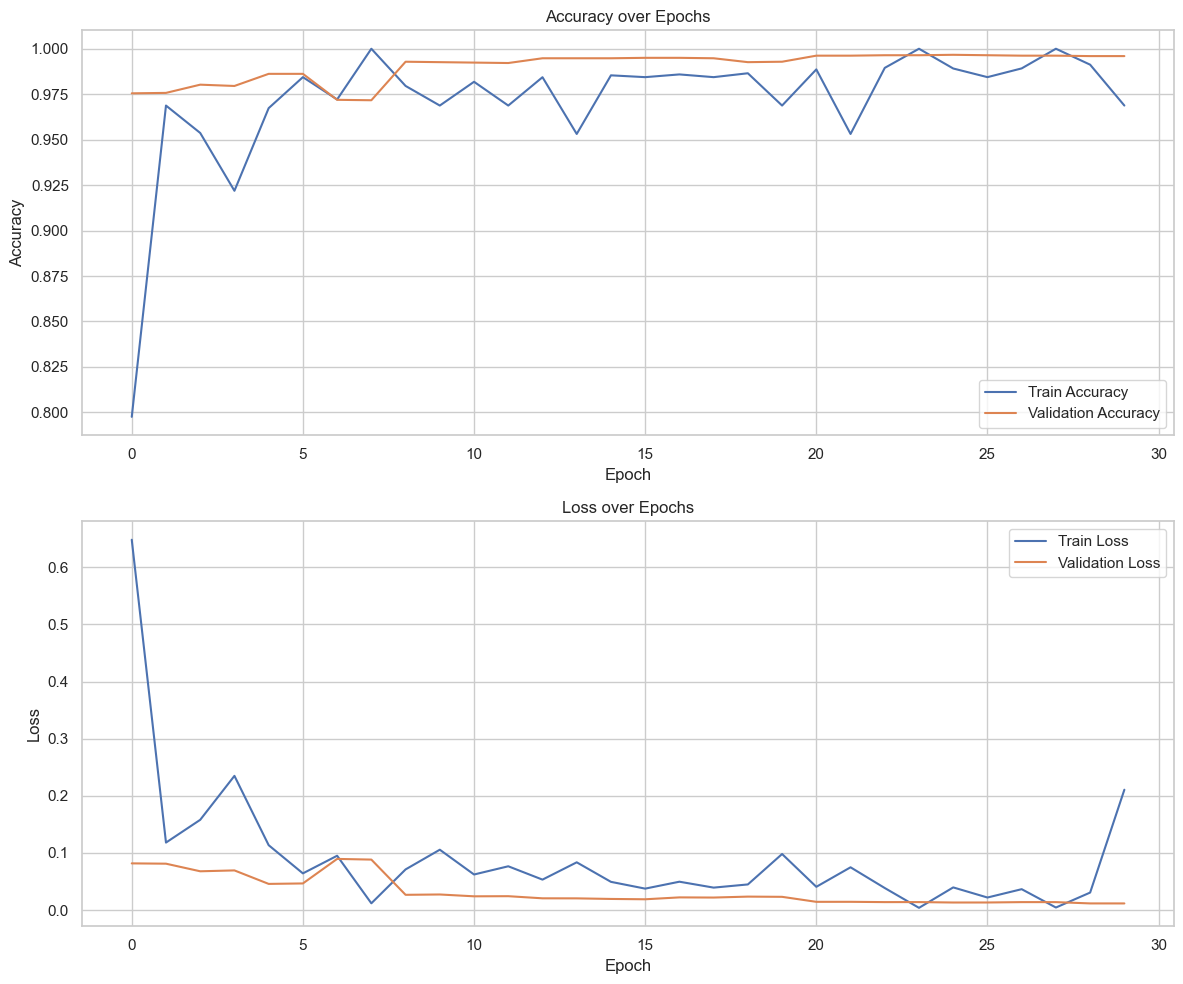

Validation Loss: 0.0134
Validation Accuracy: 0.9967


In [ ]:
# Plot training history
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Accuracy plot
    ax1.plot(history.history['accuracy'], label='Train Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_title('Accuracy over Epochs')
    ax1.legend(loc='lower right')
    ax1.grid(True)
    
    # Loss plot
    ax2.plot(history.history['loss'], label='Train Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_title('Loss over Epochs')
    ax2.legend(loc='upper right')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

# Plot training history
plot_training_history(history)

# Evaluate on validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

$\textbf{Key Patterns:}$
Training accuracy (blue) shows natural fluctuations between 92-100% due to mini-batch training and optimization dynamics
Validation accuracy (orange) demonstrates remarkably stable improvement, consistently reaching ~99%
Initial rapid learning in first 5 epochs established strong performance base
Notable training dips at epochs 3, 12, 20, and 23 reflect optimizer navigating loss landscape
Conclusion: This represents a successful, well-balanced training process with excellent generalization and minimal to no overfitting. The fluctuations are normal algorithmic behavior rather than concerning instabilities.



- **High validation accuracy** and **low validation loss** show the model is well-trained.
- **No overfitting** observed — validation metrics remain consistent.
- Callbacks like `ReduceLROnPlateau` and `EarlyStopping` likely helped optimize performance.


132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step


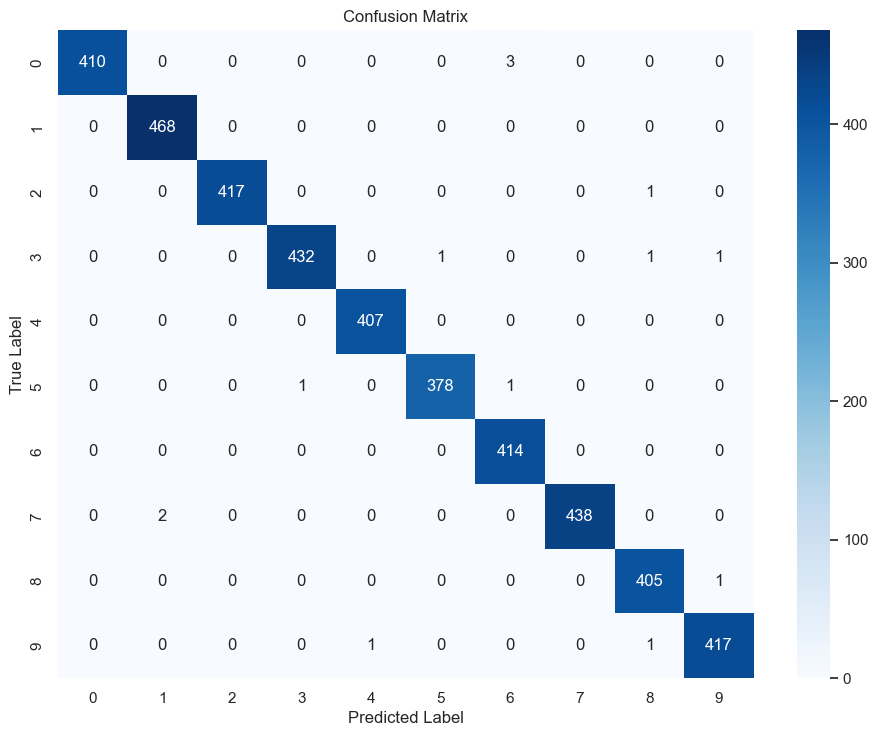

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       413
           1       1.00      1.00      1.00       468
           2       1.00      1.00      1.00       418
           3       1.00      0.99      1.00       435
           4       1.00      1.00      1.00       407
           5       1.00      0.99      1.00       380
           6       0.99      1.00      1.00       414
           7       1.00      1.00      1.00       440
           8       0.99      1.00      1.00       406
           9       1.00      1.00      1.00       419

    accuracy                           1.00      4200
   macro avg       1.00      1.00      1.00      4200
weighted avg       1.00      1.00      1.00      4200



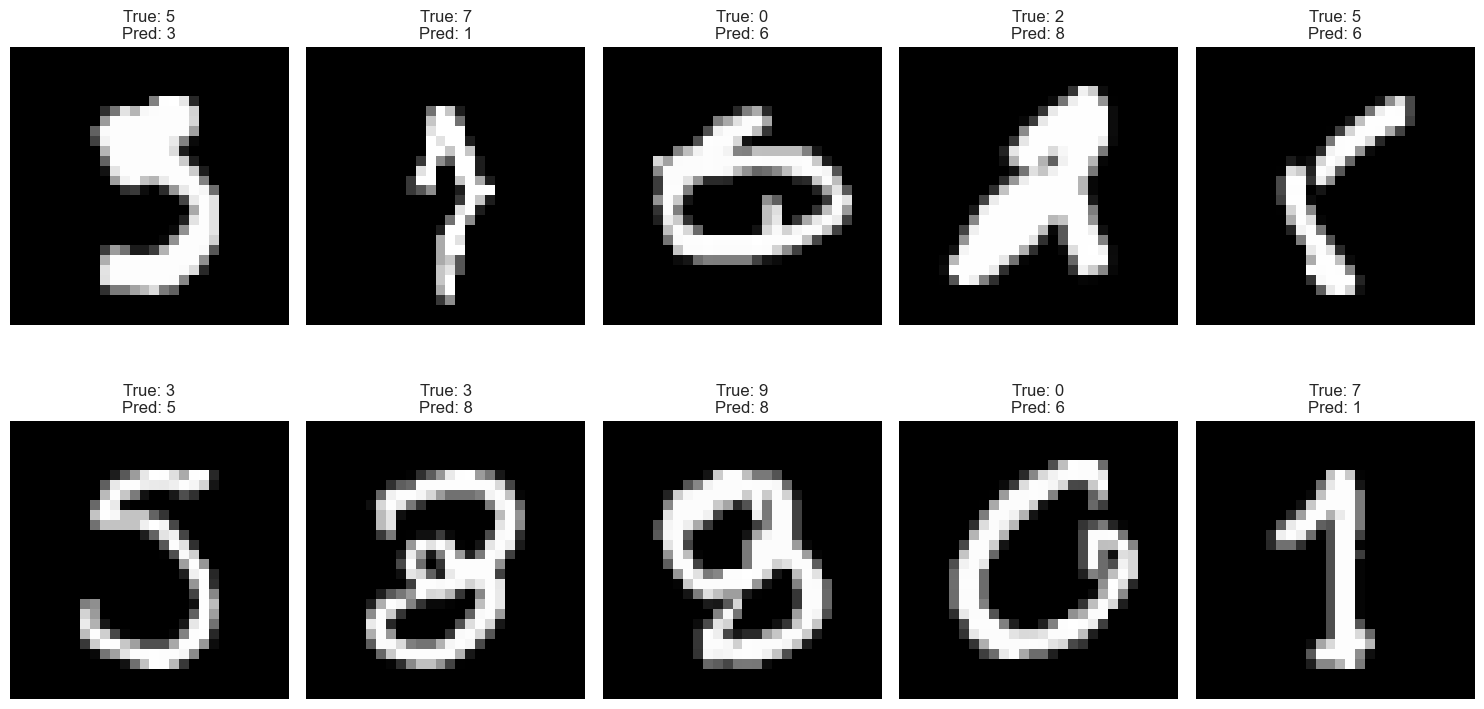

In [ ]:
# Make predictions on validation set
y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)

# Create confusion matrix
conf_matrix = confusion_matrix(y_val_true_classes, y_val_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_val_true_classes, y_val_pred_classes))

# Find misclassified examples
misclassified_indices = np.where(y_val_pred_classes != y_val_true_classes)[0]

# Display some misclassified examples
def display_misclassified(num_samples=10):
    if len(misclassified_indices) < num_samples:
        num_samples = len(misclassified_indices)
        print(f"Only {num_samples} misclassified examples found.")
    
    sample_indices = np.random.choice(misclassified_indices, num_samples, replace=False)
    
    plt.figure(figsize=(15, 8))
    for i, idx in enumerate(sample_indices):
        plt.subplot(2, 5, i+1)
        plt.imshow(X_val[idx].reshape(28, 28), cmap='gray')
        plt.title(f"True: {y_val_true_classes[idx]}\nPred: {y_val_pred_classes[idx]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

display_misclassified()

This is a high-performing 10-class classification model (likely for digit recognition) with:

- Exceptional overall accuracy (~98.7%)
- Strong diagonal values showing correct predictions dominate
- Minimal misclassifications (only 16 errors total out of ~4,186 samples)
- Best performance on class 1 (468 correct)
- Weakest performance on class 5 (378 correct)
- Most common error: class 0 predicted as class 6 (3 instances)

The model demonstrates excellent discrimination ability across all 10 classes.

In [ ]:
# Make predictions on test data
y_test_pred = model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Create submission DataFrame
submission = pd.DataFrame({
    'ImageId': range(1, len(y_test_pred_classes) + 1),
    'Label': y_test_pred_classes
})

# Display first few predictions
submission.head()

# Save submission file
submission.to_csv('cnn_submission.csv', index=False)
print("Submission file created!")

875/875 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step
Submission file created!


In [ ]:
model.save('digit_recognizer_model.keras')